In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
penguins = sns.load_dataset("penguins")

In [9]:
penguins.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [14]:
penguins_sub = penguins[penguins['species']!='Chinstrap']
penguins_sub = penguins_sub.dropna()
penguins_sub.reset_index(inplace=True,drop=True)
penguins_sub.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


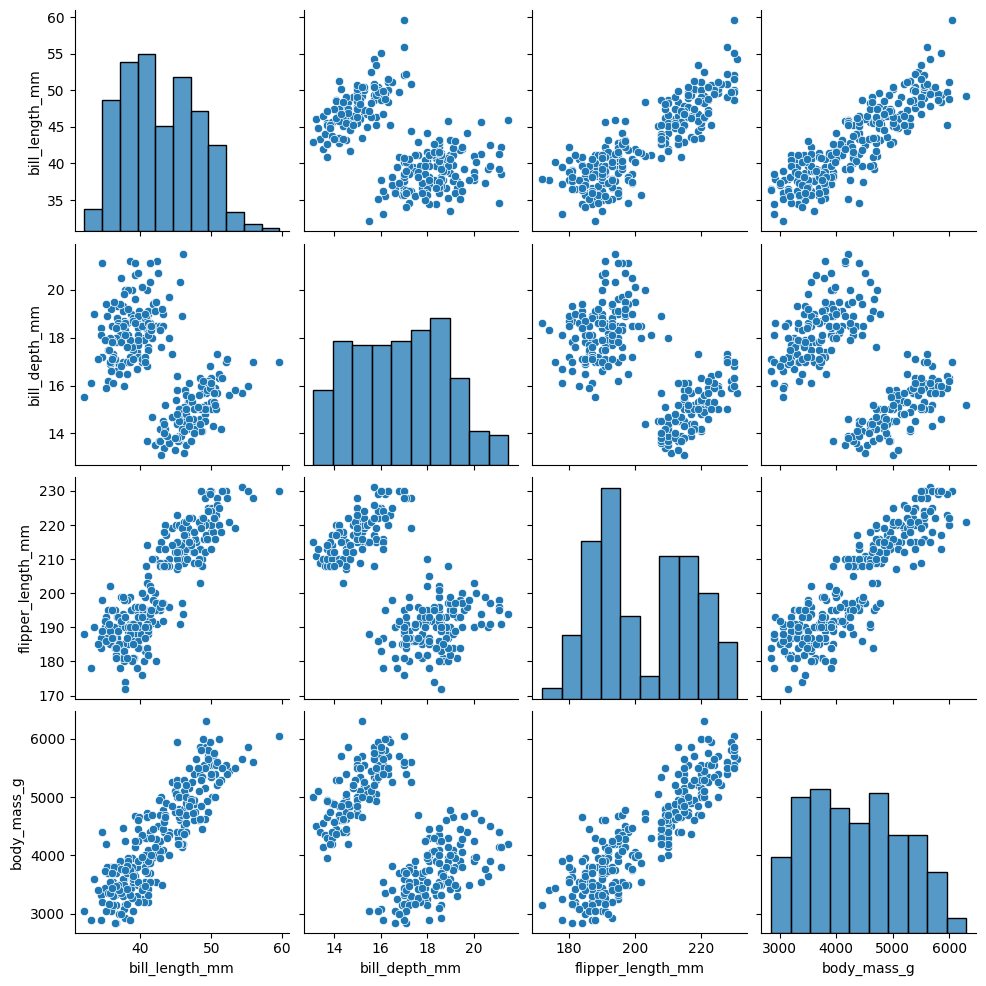

In [15]:
sns.pairplot(penguins_sub)

<h2>Model Construction</h2>

In [22]:
ols_data = penguins_sub[["bill_depth_mm","body_mass_g"]]
ols_formula = "body_mass_g ~ bill_depth_mm"

In [23]:
from statsmodels.formula.api import ols

In [24]:
OLS = ols(formula=ols_formula,data=ols_data)
model = OLS.fit()

In [77]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     80.12
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           6.53e-17
Time:                        16:12:56   Log-Likelihood:                -2124.6
No. Observations:                 265   AIC:                             4253.
Df Residuals:                     263   BIC:                             4260.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7729.3410    382.601     20.202      0.000    6975.989    8482.693
bill_depth_mm  -201.9079     22.557     -8.951      0.000    -246.323    -157.493
==============================================================================
Omnibus:                       10.301   Durbin-Watson:                   2.316
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                5.438
Skew:                           0.129   Prob(JB):                       0.0659
Kurtosis:                       2.347   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

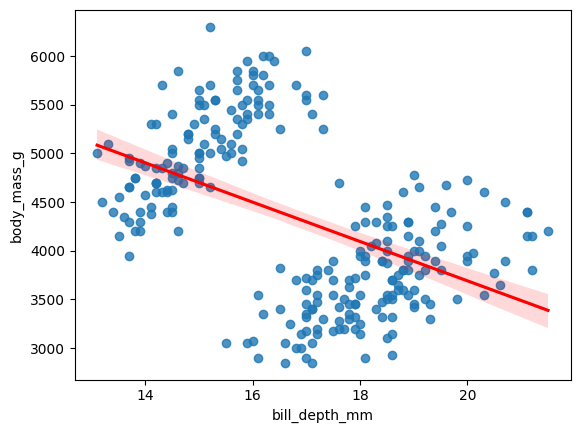

In [31]:
sns.regplot(x="bill_depth_mm",y="body_mass_g",data=ols_data,line_kws={'color':"r"})

<h2>Checking Model Assumptions</h2>

Linearity check has already been done in the pairplot\
Normality test and homoscedasticity test can only be done once the model has been created

In [33]:
X = ols_data["bill_depth_mm"]
fitted_vals = model.predict(X)


In [35]:
residuals = model.resid

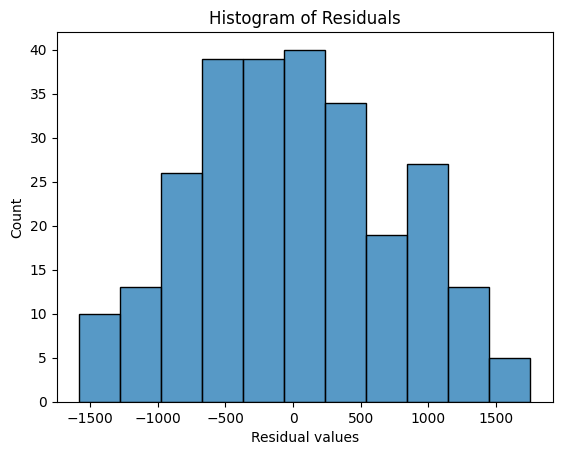

In [37]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual values")
fig.set_title("Histogram of Residuals")
plt.show()

In [38]:
import statsmodels.api as sm

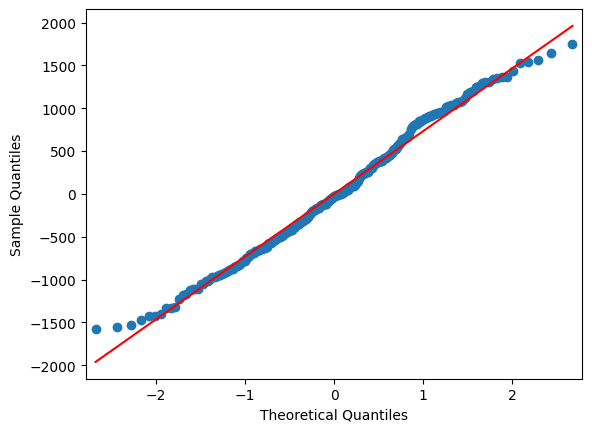

In [41]:
fig = sm.qqplot(model.resid,line='s')


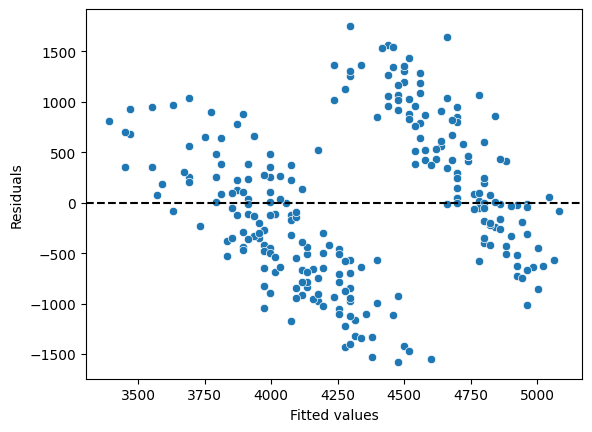

In [46]:
fig = sns.scatterplot(x=fitted_vals,y= residuals)
fig.set_xlabel("Fitted values")
fig.set_ylabel("Residuals")
fig.axhline(0,color='k',linestyle='--')
plt.show()